# Spencer Chun

,bikes
day_of_week,
Friday,91.144231
Monday,82.872024
Saturday,115.272436
Sunday,92.145833
Thursday,83.711538
Tuesday,80.057692
Wednesday,98.913462


,bikes
hour,
0,7.483871
1,4.741935
2,3.526882
3,2.021505
4,4.473118
5,12.043011
6,44.107527
7,91.086022
8,126.537634


,bikes
rain,
False,94.997661
True,21.914894


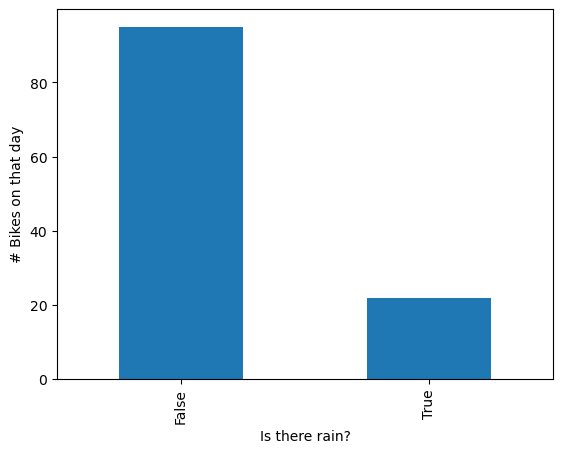

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
bike_path = pd.read_csv("https://users.ssc.wisc.edu/~mckelvey/ec390/bike_path.csv").set_index('date')
day_of_week_mean = bike_path[['bikes','day_of_week']].groupby('day_of_week').mean()
hour_mean = bike_path[['bikes','hour']].groupby('hour').mean()
rain_mean = bike_path[['bikes','rain']].groupby('rain').mean()
display(day_of_week_mean)
display(hour_mean)
display(rain_mean)
ax = rain_mean.plot.bar(legend = False)
ax.set(xlabel = "Is there rain?", ylabel = "# Bikes on that day");

C:\Users\spenc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     control_of_corruption   R-squared:                       0.529
Model:                               OLS   Adj. R-squared:                  0.527
Method:                    Least Squares   F-statistic:                     160.4
Date:                   Thu, 27 Nov 2025   Prob (F-statistic):           5.63e-27
Time:                           21:26:43   Log-Likelihood:                -191.46
No. Observations:                    190   AIC:                             386.9
Df Residuals:                        188   BIC:                             393.4
Df Model:                              1                                         
Covariance Type:                     HC1                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.6933      0.068    -10.238      0.000      -0.826      -0.561
gdp_per_capita     0.0245      0.002     12.663      0.000       0.021       0.028
==============================================================================
Omnibus:                        6.249   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                6.421
Skew:                           0.430   Prob(JB):                       0.0403
Kurtosis:                       2.736   Cond. No.                         55.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

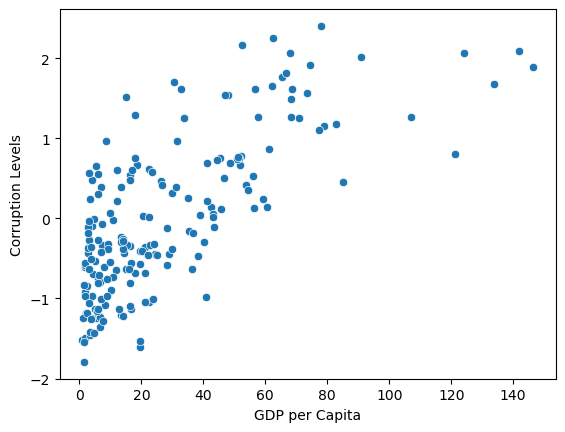

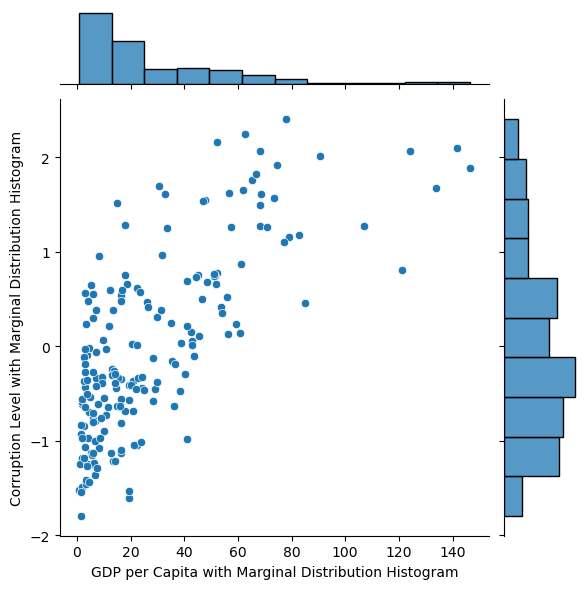

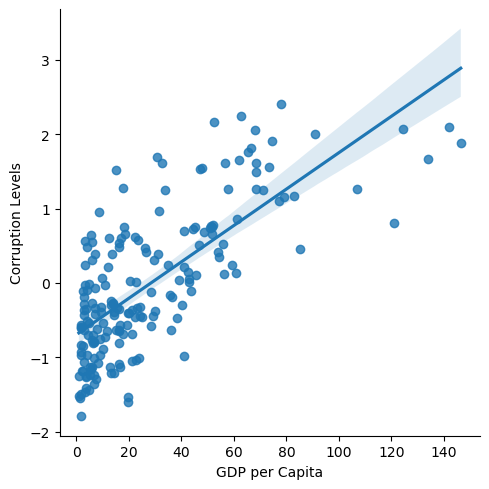

In [57]:
wb = pd.read_csv("https://users.ssc.wisc.edu/~mckelvey/ec390/wb_gdp_cc.csv").set_index('country')
ax = sns.scatterplot(x = 'gdp_per_capita', y = 'control_of_corruption', data = wb);
ax.set(xlabel = 'GDP per Capita', ylabel = 'Corruption Levels')

ax2 = sns.jointplot(x = 'gdp_per_capita', y = 'control_of_corruption', data = wb)
ax2.ax_joint.set(xlabel = 'GDP per Capita with Marginal Distribution Histogram', ylabel = 'Corruption Level with Marginal Distribution Histogram')
ax3 = sns.lmplot(x = 'gdp_per_capita', y = 'control_of_corruption', data = wb)
ax3.set(xlabel = 'GDP per Capita', ylabel = 'Corruption Levels')
import statsmodels.formula.api as smf
regression = smf.ols('control_of_corruption ~ gdp_per_capita', data = wb).fit(cov_type = "HC1")
regression.summary()